In [1]:
from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Internship/"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import math
import pickle
import datetime

from utilsOT import *
from algos import *

Mounted at /content/drive


# test

In [ ]:
n_iter = 100000
eps_init = 0.1

In [ ]:
seed = 0
np.random.seed(seed)

n_target = np.random.randint(2,20)
n_source = np.random.randint(2,20)

rho_list_target = generate_list_rho(3)
rho_list_source = generate_list_rho(3)

X_target = sample_rho_batch(rho_list_target,n_target)
nu = np.random.rand(n_target)
nu = nu/np.sum(nu) 

X_source = sample_rho_batch(rho_list_source,n_source)
mu = np.random.rand(n_source)
mu = mu/np.sum(mu)

v_list = []

v = np.zeros(n_target)
grad_vect = np.zeros([n_target,n_source])
grad_moy = np.zeros(n_target)
sum_mu = 0

t0 = datetime.datetime.now()
for i in range(0,n_iter):
    if i<n_source:
        idx = i
        sum_mu += mu[idx]
    else :
        idx = np.random.choice(range(n_source))
        sum_mu = 1
    
    epsilon = eps_init/np.sqrt(i+1)
    alpha = epsilon
    # if epsilon < 0.001:
    #     alpha = 0.001
    # else:
    #     alpha = epsilon
    
    v_list.append(v)
    
    grad_moy = grad_moy - grad_vect[:,idx]
    X_source_idx = X_source[idx,:]
    if epsilon == 0:  
        grad_idx = mu[idx] * grad_h_0(v,X_source_idx,X_target,nu)
    else:
        grad_idx = mu[idx] * grad_h_eps(v,X_source_idx,X_target,nu,epsilon)
    grad_vect[:,idx] = grad_idx
    grad_moy = grad_moy + grad_idx
    v = v + alpha / sum_mu * grad_moy

t1 = datetime.datetime.now()
v_array = np.transpose(np.array(v_list))

In [ ]:
seed = 0
np.random.seed(seed)

n_target = np.random.randint(2,20)
n_source = np.random.randint(2,20)

rho_list_target = generate_list_rho(3)
rho_list_source = generate_list_rho(3)

X_target = sample_rho_batch(rho_list_target,n_target)
nu = np.random.rand(n_target)
nu = nu/np.sum(nu) 

X_source = sample_rho_batch(rho_list_source,n_source)
mu = np.random.rand(n_source)
mu = mu/np.sum(mu)

t0 = datetime.datetime.now()
v_array = runSAG_eps_change(nu, mu, X_target, X_source, eps_init, n_iter)
t1 = datetime.datetime.now()


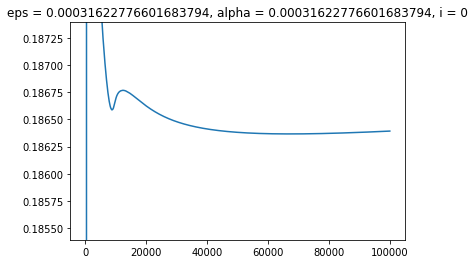

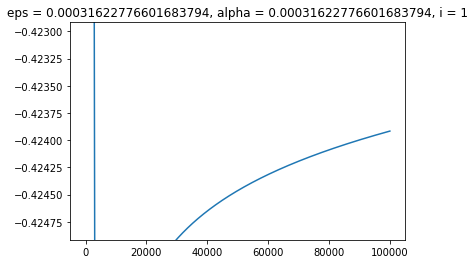

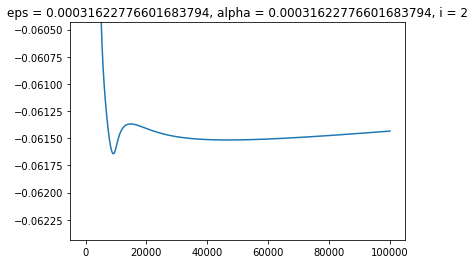

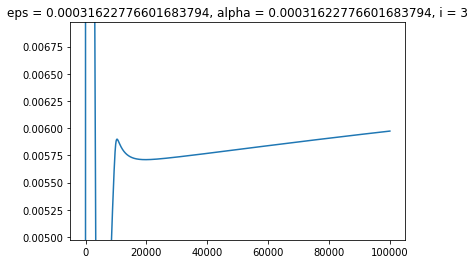

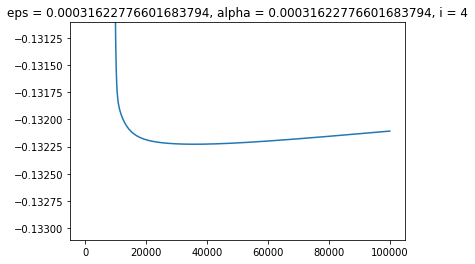

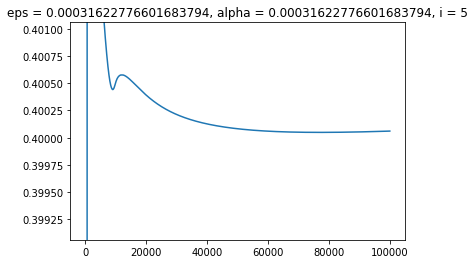

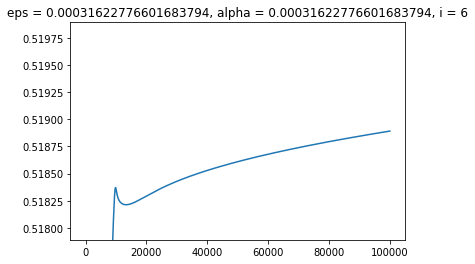

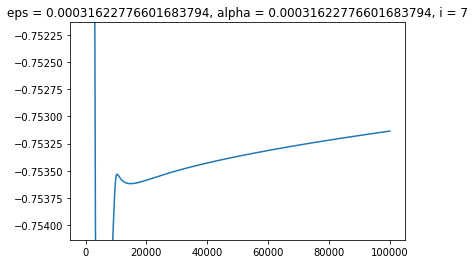

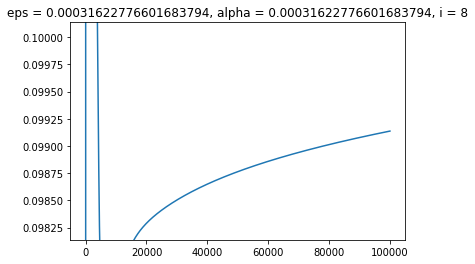

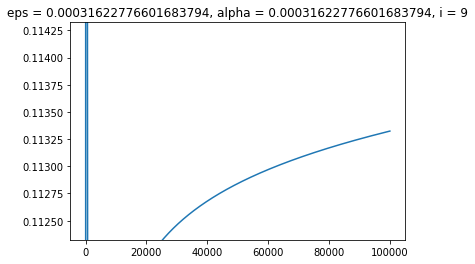

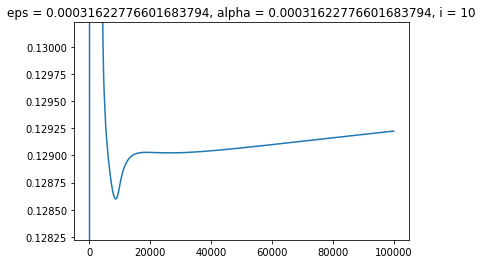

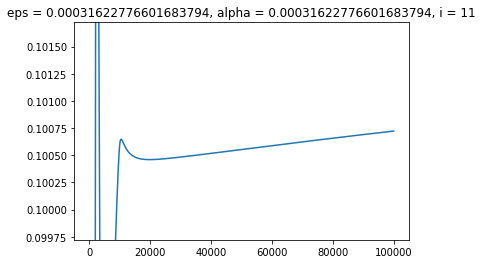

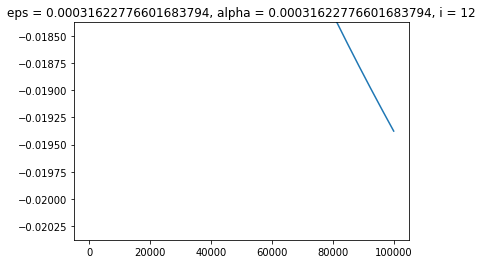

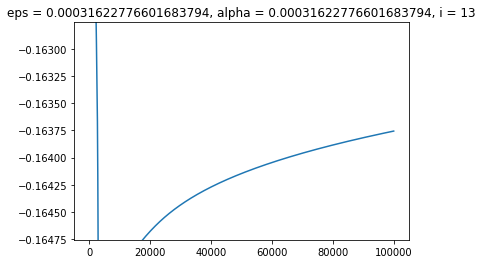

In [ ]:
for i in range(n_target):
    plt.figure()
    plt.plot(v_array[i,:])
    plt.title('eps = '+ str(epsilon) +', alpha = '+str(alpha) +', i = '+str(i))
    plt.ylim([v_array[i,-1]-10**(-3), v_array[i,-1]+10**(-3)])
    # plt.savefig('permanent/figure/semi-discrete/real/v3/'+'v_i_'+str(i)+'_eps_'+ str(epsilon) +'_alpha_'+str(alpha)+'_seed_'+str(seed)+'.png')
    plt.show()
    plt.close()

In [ ]:
v1 = v_array

In [ ]:
W1 = np.zeros([n_iter//100])
for i_w in range(n_iter//100):
    i = (i_w + 1) * 100 - 1
    W1[i_w] = W_sd(v1[:,i],X_source,X_target,mu,nu,epsilon)

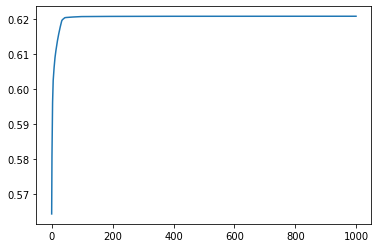

In [ ]:
plt.figure()
plt.plot(W1)
# plt.title('eps = '+ str(epsilon) +', alpha = '+str(alpha) +', i = '+str(i))
# plt.ylim([v_array[i,-1]-10**(-3), v_array[i,-1]+10**(-3)])
# plt.savefig('permanent/figure/semi-discrete/real/v3/'+'v_i_'+str(i)+'_eps_'+ str(epsilon) +'_alpha_'+str(alpha)+'_seed_'+str(seed)+'.png')
plt.show()
plt.close()

# v

In [ ]:
n_iter = 100000
list_eps_init = [10**i for i in range(-4,5,1)]

In [ ]:
def runSAG_eps_change(nu,mu,X_target,X_source,eps_init,n_iter):
    n_target = len(X_target)
    n_source = len(X_source)

    v_list = np.zeros([n_target,n_iter])
    
    v = np.zeros(n_target)
    grad_vect = np.zeros([n_target,n_source])
    grad_moy = np.zeros(n_target)
    sum_mu = 0
 
    for i in range(n_iter):

        if i<n_source:
            idx = i
            sum_mu += mu[idx]
        else :
            idx = np.random.choice(range(n_source))
            sum_mu = 1

        epsilon = eps_init/np.sqrt(i+1)
        alpha = epsilon
        
        v_list[:,i] = v
        
        grad_moy = grad_moy - grad_vect[:,idx]
        X_source_idx = X_source[idx,:]
        if epsilon == 0:  
            grad_idx = mu[idx] * grad_h_0(v,X_source_idx,X_target,nu)
        else:
            grad_idx = mu[idx] * grad_h_eps(v,X_source_idx,X_target,nu,epsilon)
        grad_vect[:,idx] = grad_idx
        grad_moy = grad_moy + grad_idx
        v = v + alpha / sum_mu * grad_moy

    return v_list

In [ ]:
for seed in range(0,100):

    if seed % 10 == 0:
        print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

    np.random.seed(seed)

    n_target = np.random.randint(2,20)
    n_source = np.random.randint(2,20)

    rho_list_target = generate_list_rho(3)
    rho_list_source = generate_list_rho(3)

    X_target = sample_rho_batch(rho_list_target,n_target)
    nu = np.random.rand(n_target)
    nu = nu/np.sum(nu) 

    X_source = sample_rho_batch(rho_list_source,n_source)
    mu = np.random.rand(n_source)
    mu = mu/np.sum(mu)

    t0 = datetime.datetime.now()

    v1 = runSAG_eps_change(nu, mu, X_target, X_source, eps_init, n_iter)
    v2 = runSAG_eps_change(mu, mu, X_source, X_source, eps_init, n_iter)
    v3 = runSAG_eps_change(nu, nu, X_target, X_target, eps_init, n_iter)

    np.save('permanent/result/S_discrete_eps_decreasing/v1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',v1)
    np.save('permanent/result/S_discrete_eps_decreasing/v2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',v2)
    np.save('permanent/result/S_discrete_eps_decreasing/v3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',v3)

    W1 = np.zeros([n_iter//100])
    W2 = np.zeros([n_iter//100])
    W3 = np.zeros([n_iter//100])
    eps_array = np.array([eps_init/np.sqrt(i+1) for i in range(n_iter)])
    for i_w in range(n_iter//100):
        i = (i_w + 1) * 100 - 1
        epsilon = eps_array[i]
        W1[i_w] = W_sd(v1[:,i],X_source,X_target,mu,nu,epsilon)
        W2[i_w] = W_sd(v2[:,i],X_source,X_source,mu,mu,epsilon)
        W3[i_w] = W_sd(v3[:,i],X_target,X_target,nu,nu,epsilon)
    
    S = W1 - 1/2*(W2+W3)

    t1 = datetime.datetime.now()

    np.save('permanent/result/S_discrete_eps_decreasing/W1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W1)
    np.save('permanent/result/S_discrete_eps_decreasing/W2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W2)
    np.save('permanent/result/S_discrete_eps_decreasing/W3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W3)
    np.save('permanent/result/S_discrete_eps_decreasing/S_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',S)

    print('epsinit: '+str(eps_init)+', seed: '+str(seed)+', time: '+ str((t1-t0).seconds))


============= from 0 to 10 =============
seed: 0, time: 25
seed: 1, time: 24
seed: 2, time: 25
seed: 3, time: 23
seed: 4, time: 23
seed: 5, time: 24
seed: 6, time: 23
seed: 7, time: 23
seed: 8, time: 24
seed: 9, time: 23
============= from 10 to 20 =============
seed: 10, time: 23
seed: 11, time: 25
seed: 12, time: 24
seed: 13, time: 24
seed: 14, time: 25
seed: 15, time: 24
seed: 16, time: 24
seed: 17, time: 25
seed: 18, time: 24
seed: 19, time: 24
============= from 20 to 30 =============
seed: 20, time: 24
seed: 21, time: 25
seed: 22, time: 25
seed: 23, time: 24
seed: 24, time: 22
seed: 25, time: 25
seed: 26, time: 25
seed: 27, time: 24
seed: 28, time: 22
seed: 29, time: 23
============= from 30 to 40 =============
seed: 30, time: 22
seed: 31, time: 24
seed: 32, time: 23
seed: 33, time: 22
seed: 34, time: 23
seed: 35, time: 24
seed: 36, time: 22
seed: 37, time: 24
seed: 38, time: 23
seed: 39, time: 24
============= from 40 to 50 =============
seed: 40, time: 23
seed: 41, time: 22
see

# test_S_error

In [ ]:
W1_all = np.zeros((100,n_iter//100))
W2_all = np.zeros((100,n_iter//100))
W3_all = np.zeros((100,n_iter//100))
S_all = np.zeros((100,n_iter//100))
error_W1_all = np.zeros((100,n_iter//100))
error_W2_all = np.zeros((100,n_iter//100))
error_W3_all = np.zeros((100,n_iter//100))
error_S_all = np.zeros((100,n_iter//100))

for seed in range(100):
    W1_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/W1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
    W2_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/W2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
    W3_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/W3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
    S_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/S_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')

    W1_theo = np.load('permanent/result/W_theo_discrete/W1_theo_seed_'+str(seed)+'.npy')
    W2_theo = np.load('permanent/result/W_theo_discrete/W2_theo_seed_'+str(seed)+'.npy')
    W3_theo = np.load('permanent/result/W_theo_discrete/W3_theo_seed_'+str(seed)+'.npy')

    error_W1_all[seed, :] = W1_all[seed, :].copy() - W1_theo
    error_W2_all[seed, :] = W2_all[seed, :].copy() - W2_theo
    error_W3_all[seed, :] = W3_all[seed, :].copy() - W3_theo
    error_S_all[seed, :] = S_all[seed, :].copy() - W1_theo


In [ ]:
np.save('permanent/result/S_discrete_eps_decreasing/error_W1_epsinit_'+str(eps_init)+'_all.npy',error_W1_all)
np.save('permanent/result/S_discrete_eps_decreasing/error_W2_epsinit_'+str(eps_init)+'_all.npy',error_W2_all)
np.save('permanent/result/S_discrete_eps_decreasing/error_W3_epsinit_'+str(eps_init)+'_all.npy',error_W3_all)
np.save('permanent/result/S_discrete_eps_decreasing/error_S_epsinit_'+str(eps_init)+'_all.npy',error_S_all)

# test_S_Regret

In [ ]:
regret_S_all = (error_S_all**2).cumsum(axis = 1)
np.save('permanent/result/S_discrete_eps_decreasing/regret_S_all_epsinit_'+str(eps_init)+'.npy',regret_S_all)

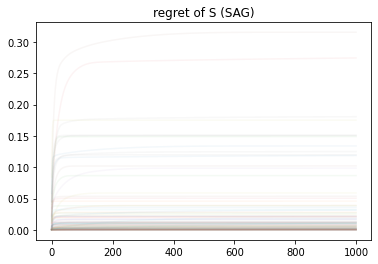

In [ ]:
plt.figure()
for seed in range(100):
    plt.plot(regret_S_all[seed,:], alpha=0.05)
plt.title('regret of S (SAG)')
#plt.yscale('log')
#plt.xscale('log')
plt.savefig('permanent/figure/S_discrete_eps_decreasing/regret_S_epsinit_'+str(eps_init)+'.png')
plt.show()
plt.close()

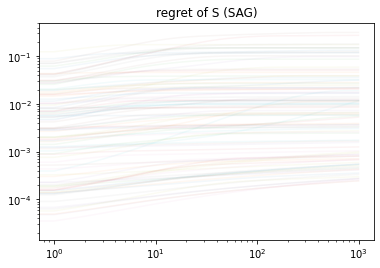

In [ ]:
plt.figure()
for seed in range(100):
    plt.plot(regret_S_all[seed,:], alpha=0.1)
plt.title('regret of S (SAG)')
plt.yscale('log')
plt.xscale('log')
plt.savefig('permanent/figure/S_discrete_eps_decreasing/regret_S_log_epsinit_'+str(eps_init)+'.png')
plt.show()
plt.close()

In [ ]:
def runALL(eps_init, n_iter):
    folder = 'eps10e'+str(np.log10(eps_init))
    for seed in range(0,100):
        if seed % 10 == 0:
            print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

        np.random.seed(seed)

        n_target = np.random.randint(2,20)
        n_source = np.random.randint(2,20)

        rho_list_target = generate_list_rho(3)
        rho_list_source = generate_list_rho(3)

        X_target = sample_rho_batch(rho_list_target,n_target)
        nu = np.random.rand(n_target)
        nu = nu/np.sum(nu) 

        X_source = sample_rho_batch(rho_list_source,n_source)
        mu = np.random.rand(n_source)
        mu = mu/np.sum(mu)

        t0 = datetime.datetime.now()

        v1 = runSAG_eps_change(nu, mu, X_target, X_source, eps_init, n_iter)
        v2 = runSAG_eps_change(mu, mu, X_source, X_source, eps_init, n_iter)
        v3 = runSAG_eps_change(nu, nu, X_target, X_target, eps_init, n_iter)

        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/v1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',v1)
        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/v2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',v2)
        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/v3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',v3)

        W1 = np.zeros([n_iter//100])
        W2 = np.zeros([n_iter//100])
        W3 = np.zeros([n_iter//100])
        eps_array = np.array([eps_init/np.sqrt(i+1) for i in range(n_iter)])
        for i_w in range(n_iter//100):
            i = (i_w + 1) * 100 - 1
            epsilon = eps_array[i]
            W1[i_w] = W_sd(v1[:,i],X_source,X_target,mu,nu,epsilon)
            W2[i_w] = W_sd(v2[:,i],X_source,X_source,mu,mu,epsilon)
            W3[i_w] = W_sd(v3[:,i],X_target,X_target,nu,nu,epsilon)
        
        S = W1 - 1/2*(W2+W3)

        t1 = datetime.datetime.now()

        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/W1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W1)
        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/W2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W2)
        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/W3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W3)
        np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/S_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',S)

        print('eps_init: '+str(eps_init)+', seed: '+str(seed)+', time: '+ str((t1-t0).seconds))

    # ======== error ======== #
    W1_all = np.zeros((100,n_iter//100))
    W2_all = np.zeros((100,n_iter//100))
    W3_all = np.zeros((100,n_iter//100))
    S_all = np.zeros((100,n_iter//100))
    error_W1_all = np.zeros((100,n_iter//100))
    error_W2_all = np.zeros((100,n_iter//100))
    error_W3_all = np.zeros((100,n_iter//100))
    error_S_all = np.zeros((100,n_iter//100))

    for seed in range(100):
        W1_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/'+folder+'/W1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
        W2_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/'+folder+'/W2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
        W3_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/'+folder+'/W3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
        S_all[seed, :] = np.load('permanent/result/S_discrete_eps_decreasing/'+folder+'/S_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')

        W1_theo = np.load('permanent/result/W_theo_discrete/W1_theo_seed_'+str(seed)+'.npy')
        W2_theo = np.load('permanent/result/W_theo_discrete/W2_theo_seed_'+str(seed)+'.npy')
        W3_theo = np.load('permanent/result/W_theo_discrete/W3_theo_seed_'+str(seed)+'.npy')

        error_W1_all[seed, :] = W1_all[seed, :].copy() - W1_theo
        error_W2_all[seed, :] = W2_all[seed, :].copy() - W2_theo
        error_W3_all[seed, :] = W3_all[seed, :].copy() - W3_theo
        error_S_all[seed, :] = S_all[seed, :].copy() - W1_theo

    np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/error_W1_epsinit_'+str(eps_init)+'_all.npy',error_W1_all)
    np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/error_W2_epsinit_'+str(eps_init)+'_all.npy',error_W2_all)
    np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/error_W3_epsinit_'+str(eps_init)+'_all.npy',error_W3_all)
    np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/error_S_epsinit_'+str(eps_init)+'_all.npy',error_S_all)

    # ======== regret ======== #
    regret_S_all = (error_S_all**2).cumsum(axis = 1)
    np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/regret_S_all_epsinit_'+str(eps_init)+'.npy',regret_S_all)



# LOOP

## eps = 10 ** 4

============= from 0 to 10 =============
eps_init: 10000, seed: 0, time: 24
eps_init: 10000, seed: 1, time: 23
eps_init: 10000, seed: 2, time: 23
eps_init: 10000, seed: 3, time: 22
eps_init: 10000, seed: 4, time: 22
eps_init: 10000, seed: 5, time: 23
eps_init: 10000, seed: 6, time: 23
eps_init: 10000, seed: 7, time: 22
eps_init: 10000, seed: 8, time: 23
eps_init: 10000, seed: 9, time: 23
============= from 10 to 20 =============
eps_init: 10000, seed: 10, time: 22
eps_init: 10000, seed: 11, time: 25
eps_init: 10000, seed: 12, time: 23
eps_init: 10000, seed: 13, time: 23
eps_init: 10000, seed: 14, time: 23
eps_init: 10000, seed: 15, time: 23
eps_init: 10000, seed: 16, time: 24
eps_init: 10000, seed: 17, time: 24
eps_init: 10000, seed: 18, time: 22
eps_init: 10000, seed: 19, time: 22
============= from 20 to 30 =============
eps_init: 10000, seed: 20, time: 23
eps_init: 10000, seed: 21, time: 23
eps_init: 10000, seed: 22, time: 23
eps_init: 10000, seed: 23, time: 22
eps_init: 10000, seed

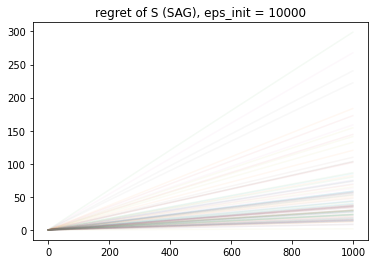

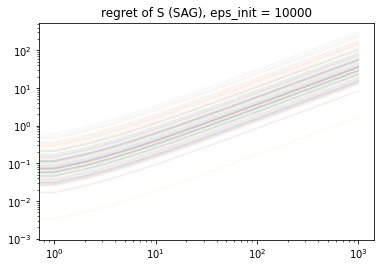

In [ ]:
n_iter = 100000
eps_init = 10000
runALL(eps_init, n_iter)

## eps = 10 ** 3

============= from 0 to 10 =============
eps_init: 1000, seed: 0, time: 23
eps_init: 1000, seed: 1, time: 22
eps_init: 1000, seed: 2, time: 23
eps_init: 1000, seed: 3, time: 22
eps_init: 1000, seed: 4, time: 22
eps_init: 1000, seed: 5, time: 22
eps_init: 1000, seed: 6, time: 22
eps_init: 1000, seed: 7, time: 22
eps_init: 1000, seed: 8, time: 23
eps_init: 1000, seed: 9, time: 21
============= from 10 to 20 =============
eps_init: 1000, seed: 10, time: 21
eps_init: 1000, seed: 11, time: 24
eps_init: 1000, seed: 12, time: 22
eps_init: 1000, seed: 13, time: 23
eps_init: 1000, seed: 14, time: 23
eps_init: 1000, seed: 15, time: 23
eps_init: 1000, seed: 16, time: 22
eps_init: 1000, seed: 17, time: 23
eps_init: 1000, seed: 18, time: 22
eps_init: 1000, seed: 19, time: 22
============= from 20 to 30 =============
eps_init: 1000, seed: 20, time: 23
eps_init: 1000, seed: 21, time: 23
eps_init: 1000, seed: 22, time: 22
eps_init: 1000, seed: 23, time: 22
eps_init: 1000, seed: 24, time: 21
eps_init: 

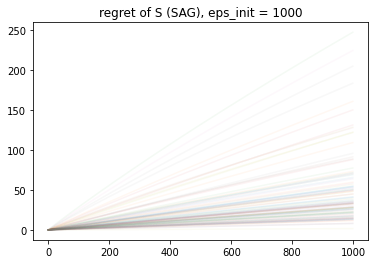

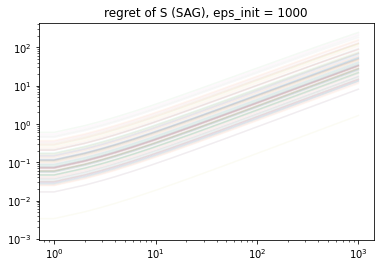

In [ ]:
n_iter = 100000
eps_init = 1000
runALL(eps_init, n_iter)

## eps = 10 ** 2

============= from 0 to 10 =============
eps_init: 100, seed: 0, time: 23
eps_init: 100, seed: 1, time: 22
eps_init: 100, seed: 2, time: 22
eps_init: 100, seed: 3, time: 22
eps_init: 100, seed: 4, time: 22
eps_init: 100, seed: 5, time: 22
eps_init: 100, seed: 6, time: 22
eps_init: 100, seed: 7, time: 23
eps_init: 100, seed: 8, time: 23
eps_init: 100, seed: 9, time: 21
============= from 10 to 20 =============
eps_init: 100, seed: 10, time: 22
eps_init: 100, seed: 11, time: 27
eps_init: 100, seed: 12, time: 22
eps_init: 100, seed: 13, time: 23
eps_init: 100, seed: 14, time: 23
eps_init: 100, seed: 15, time: 22
eps_init: 100, seed: 16, time: 23
eps_init: 100, seed: 17, time: 24
eps_init: 100, seed: 18, time: 22
eps_init: 100, seed: 19, time: 22
============= from 20 to 30 =============
eps_init: 100, seed: 20, time: 23
eps_init: 100, seed: 21, time: 23
eps_init: 100, seed: 22, time: 23
eps_init: 100, seed: 23, time: 22
eps_init: 100, seed: 24, time: 21
eps_init: 100, seed: 25, time: 23
e

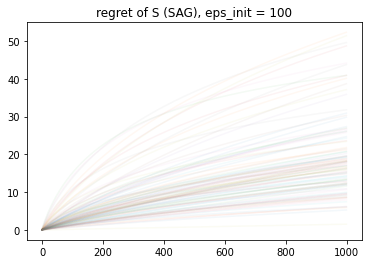

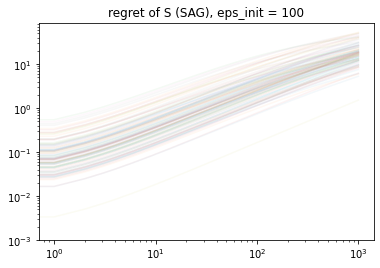

In [ ]:
n_iter = 100000
eps_init = 100
runALL(eps_init, n_iter)

## eps = 10 ** 1

============= from 0 to 10 =============
eps_init: 10, seed: 0, time: 25
eps_init: 10, seed: 1, time: 24
eps_init: 10, seed: 2, time: 25
eps_init: 10, seed: 3, time: 23
eps_init: 10, seed: 4, time: 24
eps_init: 10, seed: 5, time: 24
eps_init: 10, seed: 6, time: 24
eps_init: 10, seed: 7, time: 24
eps_init: 10, seed: 8, time: 24
eps_init: 10, seed: 9, time: 23
============= from 10 to 20 =============
eps_init: 10, seed: 10, time: 24
eps_init: 10, seed: 11, time: 25
eps_init: 10, seed: 12, time: 24
eps_init: 10, seed: 13, time: 24
eps_init: 10, seed: 14, time: 24
eps_init: 10, seed: 15, time: 24
eps_init: 10, seed: 16, time: 25
eps_init: 10, seed: 17, time: 26
eps_init: 10, seed: 18, time: 24
eps_init: 10, seed: 19, time: 24
============= from 20 to 30 =============
eps_init: 10, seed: 20, time: 25
eps_init: 10, seed: 21, time: 25
eps_init: 10, seed: 22, time: 24
eps_init: 10, seed: 23, time: 24
eps_init: 10, seed: 24, time: 23
eps_init: 10, seed: 25, time: 24
eps_init: 10, seed: 26, tim

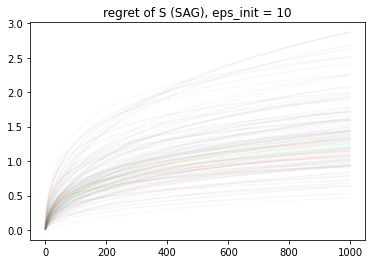

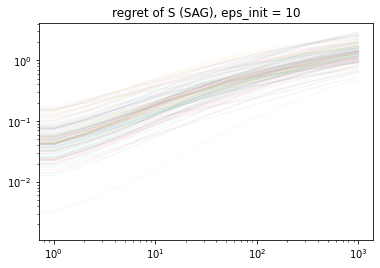

In [ ]:
n_iter = 100000
eps_init = 10
runALL(eps_init, n_iter)

## eps = 10 ** 0

============= from 0 to 10 =============
eps_init: 1, seed: 0, time: 33
eps_init: 1, seed: 1, time: 34
eps_init: 1, seed: 2, time: 35
eps_init: 1, seed: 3, time: 35
eps_init: 1, seed: 4, time: 36
eps_init: 1, seed: 5, time: 35
eps_init: 1, seed: 6, time: 34
eps_init: 1, seed: 7, time: 35
eps_init: 1, seed: 8, time: 36
eps_init: 1, seed: 9, time: 35
============= from 10 to 20 =============
eps_init: 1, seed: 10, time: 34
eps_init: 1, seed: 11, time: 36
eps_init: 1, seed: 12, time: 35
eps_init: 1, seed: 13, time: 35
eps_init: 1, seed: 14, time: 35
eps_init: 1, seed: 15, time: 35
eps_init: 1, seed: 16, time: 36
eps_init: 1, seed: 17, time: 36
eps_init: 1, seed: 18, time: 36
eps_init: 1, seed: 19, time: 34
============= from 20 to 30 =============
eps_init: 1, seed: 20, time: 35
eps_init: 1, seed: 21, time: 35
eps_init: 1, seed: 22, time: 34
eps_init: 1, seed: 23, time: 35
eps_init: 1, seed: 24, time: 35
eps_init: 1, seed: 25, time: 36
eps_init: 1, seed: 26, time: 35
eps_init: 1, seed: 27

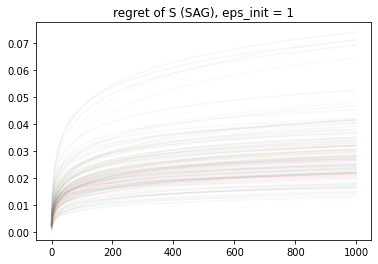

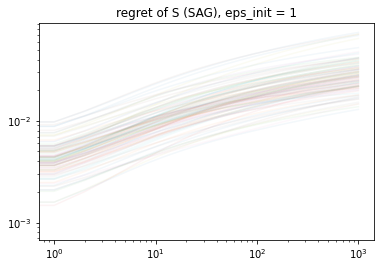

In [ ]:
n_iter = 100000
eps_init = 1
runALL(eps_init, n_iter)

## eps_init = 10 ** (-1)

============= from 0 to 10 =============
eps_init: 0.1, seed: 0, time: 26
eps_init: 0.1, seed: 1, time: 25
eps_init: 0.1, seed: 2, time: 26
eps_init: 0.1, seed: 3, time: 24
eps_init: 0.1, seed: 4, time: 25
eps_init: 0.1, seed: 5, time: 25
eps_init: 0.1, seed: 6, time: 25
eps_init: 0.1, seed: 7, time: 25
eps_init: 0.1, seed: 8, time: 26
eps_init: 0.1, seed: 9, time: 24
============= from 10 to 20 =============
eps_init: 0.1, seed: 10, time: 25
eps_init: 0.1, seed: 11, time: 27
eps_init: 0.1, seed: 12, time: 26
eps_init: 0.1, seed: 13, time: 25
eps_init: 0.1, seed: 14, time: 27
eps_init: 0.1, seed: 15, time: 25
eps_init: 0.1, seed: 16, time: 27
eps_init: 0.1, seed: 17, time: 27
eps_init: 0.1, seed: 18, time: 26
eps_init: 0.1, seed: 19, time: 25
============= from 20 to 30 =============
eps_init: 0.1, seed: 20, time: 26
eps_init: 0.1, seed: 21, time: 26
eps_init: 0.1, seed: 22, time: 26
eps_init: 0.1, seed: 23, time: 25
eps_init: 0.1, seed: 24, time: 24
eps_init: 0.1, seed: 25, time: 26
e

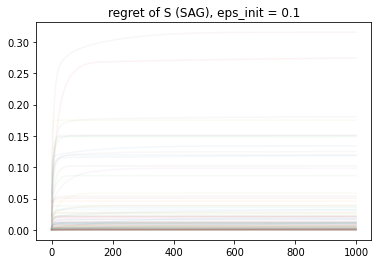

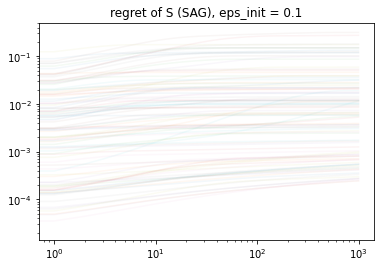

In [ ]:
n_iter = 100000
eps_init = 0.1
runALL(eps_init, n_iter)

## eps_init = 10 ** (-2)

============= from 0 to 10 =============
eps_init: 0.01, seed: 0, time: 26
eps_init: 0.01, seed: 1, time: 25
eps_init: 0.01, seed: 2, time: 26
eps_init: 0.01, seed: 3, time: 24
eps_init: 0.01, seed: 4, time: 25
eps_init: 0.01, seed: 5, time: 25
eps_init: 0.01, seed: 6, time: 25
eps_init: 0.01, seed: 7, time: 25
eps_init: 0.01, seed: 8, time: 26
eps_init: 0.01, seed: 9, time: 24
============= from 10 to 20 =============
eps_init: 0.01, seed: 10, time: 25
eps_init: 0.01, seed: 11, time: 26
eps_init: 0.01, seed: 12, time: 25
eps_init: 0.01, seed: 13, time: 25
eps_init: 0.01, seed: 14, time: 25
eps_init: 0.01, seed: 15, time: 25
eps_init: 0.01, seed: 16, time: 25
eps_init: 0.01, seed: 17, time: 26
eps_init: 0.01, seed: 18, time: 24
eps_init: 0.01, seed: 19, time: 24
============= from 20 to 30 =============
eps_init: 0.01, seed: 20, time: 25
eps_init: 0.01, seed: 21, time: 26
eps_init: 0.01, seed: 22, time: 25
eps_init: 0.01, seed: 23, time: 25
eps_init: 0.01, seed: 24, time: 24
eps_init: 

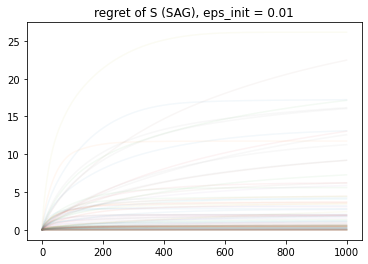

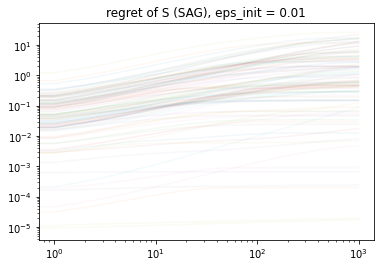

In [ ]:
n_iter = 100000
eps_init = 0.01
runALL(eps_init, n_iter)

## eps_init = 10 ** (-3)

============= from 0 to 10 =============
eps_init: 0.001, seed: 0, time: 25
eps_init: 0.001, seed: 1, time: 25
eps_init: 0.001, seed: 2, time: 26
eps_init: 0.001, seed: 3, time: 23
eps_init: 0.001, seed: 4, time: 24
eps_init: 0.001, seed: 5, time: 23
eps_init: 0.001, seed: 6, time: 22
eps_init: 0.001, seed: 7, time: 22
eps_init: 0.001, seed: 8, time: 24
eps_init: 0.001, seed: 9, time: 23
============= from 10 to 20 =============
eps_init: 0.001, seed: 10, time: 22
eps_init: 0.001, seed: 11, time: 24
eps_init: 0.001, seed: 12, time: 23
eps_init: 0.001, seed: 13, time: 23
eps_init: 0.001, seed: 14, time: 23
eps_init: 0.001, seed: 15, time: 23
eps_init: 0.001, seed: 16, time: 23
eps_init: 0.001, seed: 17, time: 24
eps_init: 0.001, seed: 18, time: 22
eps_init: 0.001, seed: 19, time: 22
============= from 20 to 30 =============
eps_init: 0.001, seed: 20, time: 23
eps_init: 0.001, seed: 21, time: 23
eps_init: 0.001, seed: 22, time: 23
eps_init: 0.001, seed: 23, time: 22
eps_init: 0.001, seed

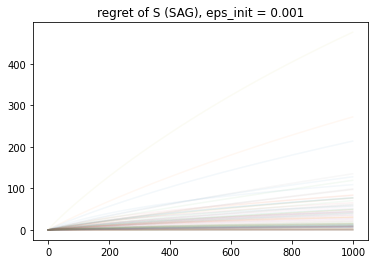

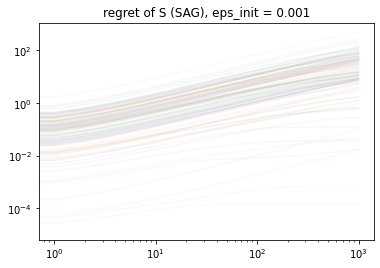

In [ ]:
n_iter = 100000
eps_init = 0.001
runALL(eps_init, n_iter)

## eps_init = 10 ** (-4)

============= from 0 to 10 =============
eps_init: 0.0001, seed: 0, time: 31
eps_init: 0.0001, seed: 1, time: 31
eps_init: 0.0001, seed: 2, time: 31
eps_init: 0.0001, seed: 3, time: 30
eps_init: 0.0001, seed: 4, time: 30
eps_init: 0.0001, seed: 5, time: 30
eps_init: 0.0001, seed: 6, time: 30
eps_init: 0.0001, seed: 7, time: 30
eps_init: 0.0001, seed: 8, time: 31
eps_init: 0.0001, seed: 9, time: 30
============= from 10 to 20 =============
eps_init: 0.0001, seed: 10, time: 31
eps_init: 0.0001, seed: 11, time: 32
eps_init: 0.0001, seed: 12, time: 31
eps_init: 0.0001, seed: 13, time: 32
eps_init: 0.0001, seed: 14, time: 31
eps_init: 0.0001, seed: 15, time: 31
eps_init: 0.0001, seed: 16, time: 31
eps_init: 0.0001, seed: 17, time: 32
eps_init: 0.0001, seed: 18, time: 31
eps_init: 0.0001, seed: 19, time: 30
============= from 20 to 30 =============
eps_init: 0.0001, seed: 20, time: 31
eps_init: 0.0001, seed: 21, time: 32
eps_init: 0.0001, seed: 22, time: 30
eps_init: 0.0001, seed: 23, time: 

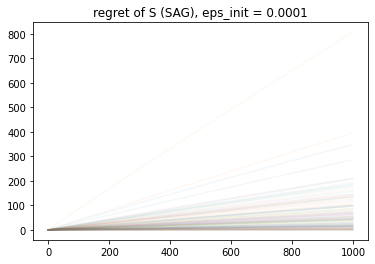

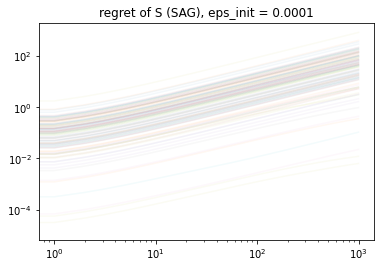

In [ ]:
n_iter = 100000
eps_init = 0.0001
runALL(eps_init, n_iter)

# Plot

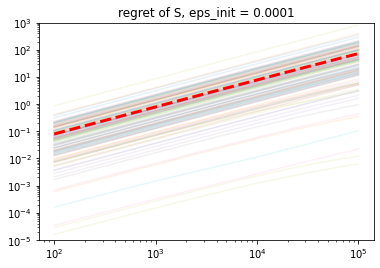

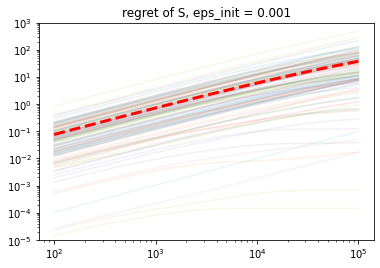

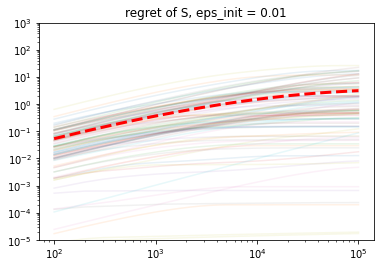

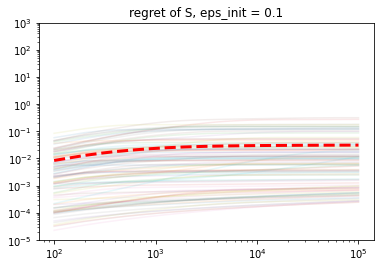

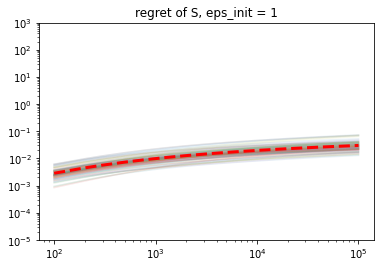

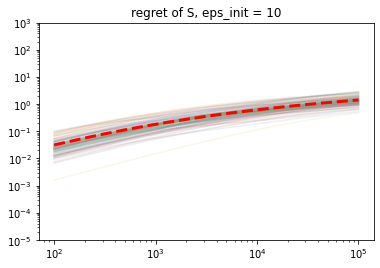

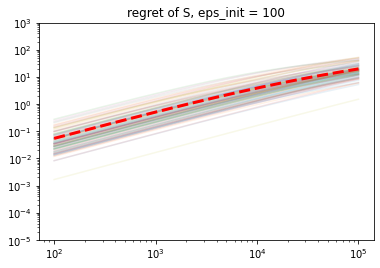

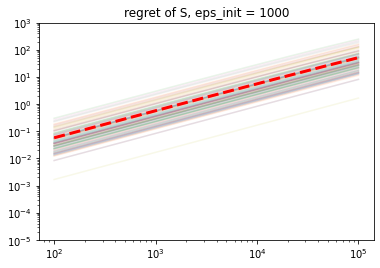

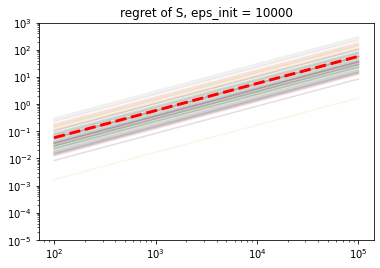

In [ ]:
n_iter = 100000
list_eps_init = [10**i for i in range(-4,5,1)]
for eps_init in list_eps_init:
    folder = 'eps10e'+str(np.log10(eps_init))
    regret_S_all = np.load('permanent/result/S_discrete_eps_decreasing/'+folder+'/regret_S_all_epsinit_'+str(eps_init)+'.npy')

    regret_S_average_all = regret_S_all.mean(axis = 0)
    np.save('permanent/result/S_discrete_eps_decreasing/'+folder+'/regret_S_average_all_epsinit_'+str(eps_init)+'.npy',regret_S_average_all)

    plt.figure()
    for seed in range(100):
        plt.plot(range(100,100+n_iter,100),regret_S_all[seed,:], alpha=0.1)
    plt.plot(range(100, n_iter+100, 100), regret_S_average_all, alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-5),10**(3)))
    plt.title('regret of S, eps_init = '+str(eps_init))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_discrete_eps_decreasing/regret_S_epsinit_'+str(eps_init)+'.png')
    plt.show()
    plt.close()


In [ ]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/f/f9/Beep_example.ogg").play()')